In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

In [2]:
dataset=pd.read_csv('TOR.csv')
dataset.head()

,Unnamed: 0,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'NONTOR'
1,1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'NONTOR'
2,2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'NONTOR'
3,3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'NONTOR'
4,4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'NONTOR'


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76988 entries, 0 to 76987
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          76988 non-null  int64  
 1   duration            76988 non-null  float64
 2   total_fiat          76988 non-null  float64
 3   total_biat          76988 non-null  float64
 4   min_fiat            76988 non-null  float64
 5   min_biat            76988 non-null  float64
 6   max_fiat            76988 non-null  float64
 7   max_biat            76988 non-null  float64
 8   mean_fiat           76988 non-null  float64
 9   mean_biat           76988 non-null  float64
 10  flowPktsPerSecond   76988 non-null  float64
 11  flowBytesPerSecond  76988 non-null  float64
 12  min_flowiat         76988 non-null  float64
 13  max_flowiat         76988 non-null  float64
 14  mean_flowiat        76988 non-null  float64
 15  std_flowiat         76988 non-null  float64
 16  min_

In [4]:
dataset.class1.value_counts()

b'NONTOR'    66818
b'TOR'       10170
Name: class1, dtype: int64

In [5]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
dataset['class1']= label_encoder.fit_transform(dataset['class1']) 
dataset['class1'].unique() 

array([0, 1])

In [6]:
dataset.head(2)

,Unnamed: 0,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,0
1,1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,0


In [7]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
dataset.head(2)

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,0
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,0


In [9]:
features = dataset.iloc[:,0:22].values
labels = dataset.iloc [:,23].values

In [10]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [11]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

In [12]:
model = Sequential()
model.add(Dense(units= 50, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=64, epochs=50)
acc_testing  = model.evaluate(testing_data, testing_label)


Epoch 1/50
963/963 [==============================] - 2s 2ms/step - loss: 0.0739 - accuracy: 0.9893 - val_loss: 0.0238 - val_accuracy: 0.9938
Epoch 2/50
963/963 [==============================] - 2s 2ms/step - loss: 0.0188 - accuracy: 0.9953 - val_loss: 0.0161 - val_accuracy: 0.9960
Epoch 3/50
963/963 [==============================] - 2s 2ms/step - loss: 0.0145 - accuracy: 0.9967 - val_loss: 0.0130 - val_accuracy: 0.9969
Epoch 4/50
963/963 [==============================] - 2s 2ms/step - loss: 0.0122 - accuracy: 0.9971 - val_loss: 0.0136 - val_accuracy: 0.9969
Epoch 5/50
963/963 [==============================] - 2s 2ms/step - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.0090 - val_accuracy: 0.9977
Epoch 6/50
963/963 [==============================] - 2s 2ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0085 - val_accuracy: 0.9977
Epoch 7/50
963/963 [==============================] - 2s 2ms/step - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 

In [14]:
acc_training.history

{'loss': [0.07393360882997513,
  0.01884419098496437,
  0.014514648355543613,
  0.012196131981909275,
  0.01020659226924181,
  0.008278862573206425,
  0.007495612371712923,
  0.006567380856722593,
  0.00614065071567893,
  0.005769183859229088,
  0.0054489909671247005,
  0.005156304221600294,
  0.004961948376148939,
  0.004742620978504419,
  0.0048189107328653336,
  0.0046074469573795795,
  0.004559517838060856,
  0.0044523850083351135,
  0.004281662404537201,
  0.004448555409908295,
  0.004153824411332607,
  0.004216006025671959,
  0.004250902216881514,
  0.0039304522797465324,
  0.0040701404213905334,
  0.004000925458967686,
  0.0037923564668744802,
  0.004097751807421446,
  0.003977151121944189,
  0.003851312445476651,
  0.003800423815846443,
  0.003763120388612151,
  0.003569214139133692,
  0.00372146419249475,
  0.0036734831519424915,
  0.0035621921997517347,
  0.003549718763679266,
  0.0036731113214045763,
  0.00352734187617898,
  0.0036420312244445086,
  0.0036006667651236057,
  

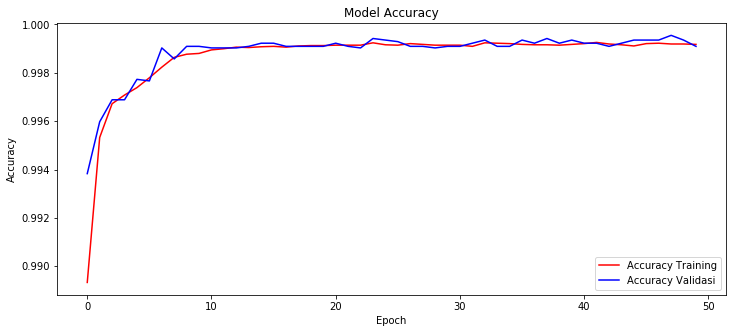

In [15]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Accuracy Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Accuracy Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()

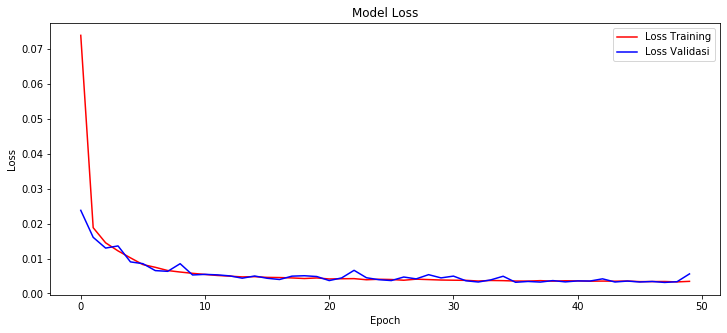

In [16]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

In [17]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [18]:
training_predicted.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [19]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

In [20]:
training_cm

tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9991557070953077
Specificity training 0.9936086529006883
Sensitivity training 1.0
Precision training 0.9990281463761074
F1 Score training 0.999513836948392


In [21]:
testing_cm

tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9990907910118197
Specificity testing 0.9931170108161259
Sensitivity testing 1.0
Precision testing 0.9989535057557184
F1 Score testing 0.9994764789469748
